# Análise Exploratória do Perfil dos Candidatos nas eleições municipais em 2020: Vitória da Conquista - BA

Esse notebook contém uma análise do perfil dos candidados eleitorais em 2020 do município de Vitória da Conquista, Ba. <br>
A seção de análise exploratória está dividida em duas partes. A primeira contém a visualização dos dados econômicos e sociais dos candidatos nas eleições municipais de 2020. A segunda apresenta um comparativo entre os dados das eleições de 2020 com os de 2016. <br>

Os dados foram extraídos do <a href="http://www.seplan.ba.gov.br/modules/conteudo/conteudo.php?conteudo=17">Repositório de Dados Eleitorais</a> do Tribunal Superior Eleitoral. Os datasets utilizados nesse notebook consistem em um subset daqueles disponibilizados pelo Repositório (filtrou-se os dados relativos ao município de Vitória da Conquista).

<i>"Da pátria vou saber as glórias mil <br>
Conquista, que emoção vibra em meu peito,<br>
Ao fitar-te no mapa do brasil."</i> - Hino de Vitória da Conquista <br>

## 0) Contexto

<p>Com população estimada para 2020 de 341.128 pessoas, Vitória da Conquista é a terceira maior cidade do estado da Bahia e, de acordo com o censo de 2010, a septuagésima oitava do Brasil. Com relação ao PIB, possui o sexto maior PIB baiano. <br>
Desde o final da década de 80, o município cresceu 
</p>

## 1) Carregando Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#pd.set_option('display.float_format', lambda x: '%.5f' % x)

## 2) Importação e tratamento dos Dados

In [2]:
#Importação dos dados
df_vcaBem = pd.read_csv('data/vcaBens.csv')
df_cand16 = pd.read_csv('data/vca2016.csv')
df_cand20 = pd.read_csv('data/vca2020.csv')

In [3]:
print('Dataset Bens declarados: ', df_vcaBem.shape[0], 'linhas e ', df_vcaBem.shape[1], 'colunas. \n')
print('Dataset Perfil Candidatos 2016: ', df_cand16.shape[0], 'linhas e ', df_cand16.shape[1], 'colunas. \n')
print('Dataset Perfil Candidatos 2020: ', df_cand20.shape[0], 'linhas e ', df_cand20.shape[1], 'colunas.')

Dataset Bens declarados:  747 linhas e  4 colunas. 

Dataset Perfil Candidatos 2016:  405 linhas e  12 colunas. 

Dataset Perfil Candidatos 2020:  454 linhas e  12 colunas.


<p>
Conforme os dados, nas eleições municipais de 2020 o município de Vitória da Conquista possui 49 candidados a mais de prefeitos, vice-prefeitos e vereadores.
A proporção exata do aumento de cada um será analisada mais a frente neste notebook.
</p>

#### Tratando valores inconsistentes

In [4]:
print(df_vcaBem.info(), '\n')
print(df_cand16.info(), '\n')
print(df_cand20.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   NM_UE                  747 non-null    object 
 1   SQ_CANDIDATO           747 non-null    int64  
 2   DS_TIPO_BEM_CANDIDATO  747 non-null    object 
 3   VR_BEM_CANDIDATO       747 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 23.5+ KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ANO_ELEICAO              405 non-null    int64 
 1   NM_UE                    405 non-null    object
 2   DS_CARGO                 405 non-null    object
 3   NR_CANDIDATO             405 non-null    int64 
 4   NR_PARTIDO               405 non-null    int64 
 5   SG_PARTIDO               405 non-

In [5]:
df_cand16 = df_cand16.rename(columns = {'NM_UE': 'Unidade Eleitoral', 'ANO_ELEICAO': 'Ano', 'SG_PARTIDO': 'Partido',\
                                        'NM_MUNICIPIO_NASCIMENTO': 'Município de Nascimento','NR_IDADE_DATA_POSSE': 'Idade','DS_GENERO': 'Sexo','DS_GRAU_INSTRUCAO': 'Grau de Instrução','DS_COR_RACA': 'Cor/Raça'}, inplace = False)
df_cand20 = df_cand20.rename(columns = {'NM_UE': 'Year', 'ANO_ELEICAO': 'Ano', 'SG_PARTIDO': 'Partido',\
                                        'NM_MUNICIPIO_NASCIMENTO': 'Município de Nascimento','NR_IDADE_DATA_POSSE': 'Idade','DS_GENERO': 'Sexo','DS_GRAU_INSTRUCAO': 'Grau de Instrução','DS_COR_RACA': 'Cor/Raça'}, inplace = False)

<p>
A Coluna com o registro do candidato (SQ_CANDIDATO) possui o formato 'inteiro'. Contudo, por se tratar de uma identificação, optou-se por converter para o tipo 'objeto' para facilitar possíveis análises
</p>

In [6]:
# transformar a coluna do registro do candidato para o tipo objeto
df_vcaBem['SQ_CANDIDATO'] = df_vcaBem['SQ_CANDIDATO'].astype('object')

<p>
Alguns elementos da coluna de descrição dos bens declarados pelos candidadots possuem muitos caracteres. Para facilitar na apresenação, reduziu-se em um tamanho que possibilite tanto a identificação quanto uma apresentação mais fácil em gráficos.
</p>

In [7]:
#Encurtar a coluna da descrição dos bens visto que alguns elementos são demasiados longos
df_vcaBem['TipoBem']=df_vcaBem['DS_TIPO_BEM_CANDIDATO'].str[:20]

<p>O mesmo ocorre com os elementos da coluna de descrição das ocupações nos datasets 'df_cand16' e 'df_cand20'.<br>
Portanto, é criada uma coluna ('Ocupacao') em cada dataset com as strings reduzidas

</p>

In [8]:
#Encurtar a coluna da descrição dos bens visto que alguns elementos são demasiados longos
df_cand16['Ocupação']=df_cand16['DS_OCUPACAO'].str[:20]
df_cand20['Ocupação']=df_cand20['DS_OCUPACAO'].str[:20]

In [9]:
#Colocando strings em caixa baixa com primeira letra maiúscula
df_cand16,df_cand20  = df_cand16.apply(lambda x: x.astype(str).str.title()), df_cand20.apply(lambda x: x.astype(str).str.title())
df_vcaBem = df_vcaBem.apply(lambda x: x.astype(str).str.title())
df_cand16['Idade'] = df_cand16['Idade'].astype('int64')
df_cand20['Idade'] = df_cand20['Idade'].astype('int64')
df_vcaBem['VR_BEM_CANDIDATO'] = df_vcaBem['VR_BEM_CANDIDATO'].astype('float64')

<p>
Conforme o output a seguir, há várias ocorrências para uma mesma cidade no dataset referente ao ano de 2016. Por exemplo, Vitória da Conquista possui três ocorrências distintas: 'Vitória da conquista', 'Vitoria da conquista' (sem acento), 'Vitória Da Conquista Ba' e 'Vitoria Da Conquiata'. <br>
Em seguida é criada uma função para corrigir esse problema. Contudo, embora há outros municípios com escrita incorreta, será corrigida apenas a múltipla ocorrência.

In [10]:
dfa =  df_cand16['Município de Nascimento'].unique()
dfa.sort()
dfa

array(['Alagoinhas', 'Amargosa', 'Anage', 'Anagé', 'Antas', 'Aquidaba',
       'Aracajú', 'Arataca', 'Bage', 'Barra Da Estiva', 'Barra Do Choca',
       'Barra Do Choça', 'Barreiras', 'Barueri', 'Belo Campo',
       'Belo Horizonte', 'Boa Nova', 'Bom Jesus Da Lapa',
       'Bom Jesus Da Serra', 'Brasilia', 'Brasilia De Minas', 'Brumado',
       'Caatiba', 'Caetanos', 'Camacã', 'Camaçari', 'Candido Sales',
       'Caraguatatuba', 'Caravelas', 'Conceicao Do Coite', 'Condeúba',
       'Cândido Sales', 'Ecoporanga', 'Encruzilhada', 'Eunapolis',
       'Feira De Santana', 'Firmino Alves', 'Governador Valadares',
       'Gracho Cardoso', 'Guanambi', 'Guarulhos', 'Ibicoara', 'Ibicuí',
       'Ilhéus', 'Inaja', 'Itaberá', 'Itabuna', 'Itaete', 'Itagiba',
       'Itagibá', 'Itagimirim', 'Itambe', 'Itambé', 'Itapetinga',
       'Itaquera', 'Itarantim', 'Itororo', 'Ituaçu', 'Jequie', 'Jordania',
       'José Bonifácio', 'Jurema', 'Lauro De Freitas',
       'Licínio De Almeida', 'Livramento De Noss

In [11]:
import fuzzywuzzy
from fuzzywuzzy import process

C:\Users\KahAn\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [12]:
# Função para pegar as strings parecidas e substituir as erradas pela correta
def replace_matches(df, column, string_to_match, min_ratio = 47):
    # get a list of unique strings
    strings = df[column].unique()

    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                             limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches 
    df.loc[rows_with_matches, column] = string_to_match

    # let us know the function's done
    print("Feito!")

In [13]:
inconsist_2020 = ['Anagé','Barra Do Choça', 'Itambé','Poções','São Paulo','Santa Cruz Da Vitória', 'Vitória da Conquista']
for inc in inconsist_2020:
    replace_matches(df_cand16, 'Município de Nascimento', inc)

Feito!
Feito!
Feito!
Feito!
Feito!
Feito!
Feito!


## 3) Perfil dos Candidatos - Eleições Municipais 2020: Vitória da Conquista - BA

#### 3.1) Declação dos bens pelos candidatos em 2020

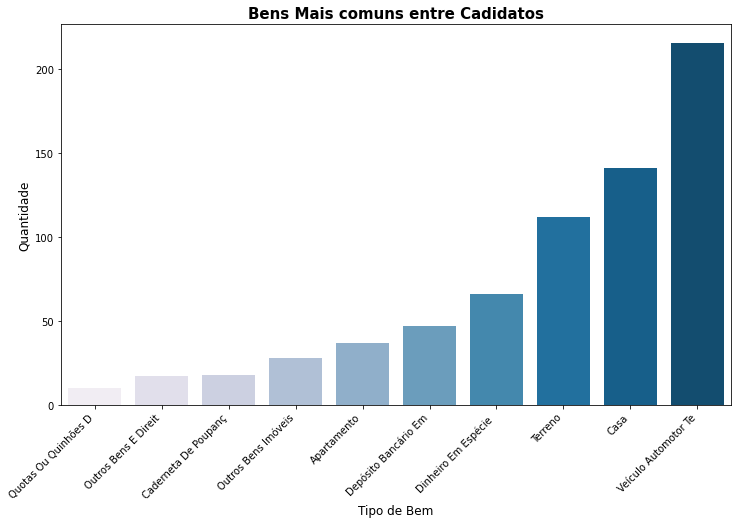

In [14]:
#Plotando os 10 produtos mais frequentes
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(x='TipoBem', data=df_vcaBem, palette='PuBu',
              order=df_vcaBem['TipoBem'].value_counts()[:10]\
             .sort_values().index).set_title('Bens Mais comuns entre Cadidatos', fontsize=15,
                                             weight='bold')
plt.xlabel('Tipo de Bem', fontdict= {'size':12})
plt.ylabel('Quantidade',fontdict= {'size':12})
plt.xticks(rotation=45, horizontalalignment='right');

In [15]:
#Agrupando pelo tipo de bem
df_vca_grouped = df_vcaBem.groupby('TipoBem')

In [16]:
# Obtendo a média por bem agrupado
df_vca_gpmean = df_vca_grouped.mean()
df_vca_gpmean = df_vca_gpmean.reset_index().sort_values('VR_BEM_CANDIDATO')[-10:]
#df_vca_gpmean.head(10)

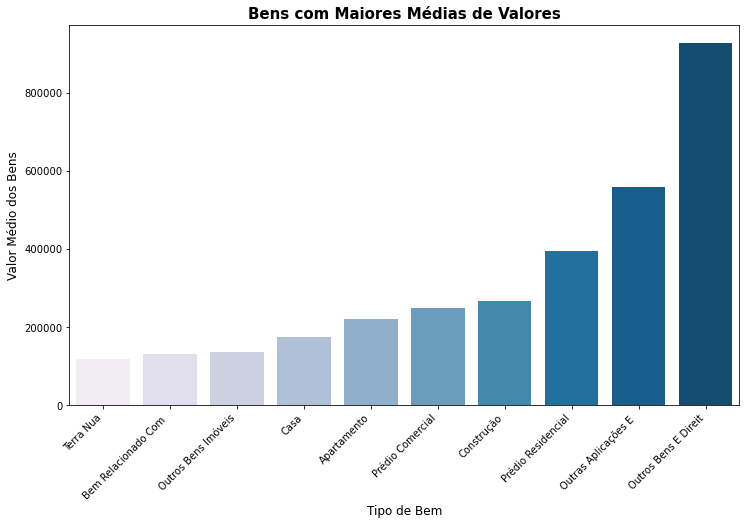

In [17]:
#Plotting as 10 maiores médias
plt.figure(figsize=(12,7))
g_vca_mean = sns.barplot(x="TipoBem", y="VR_BEM_CANDIDATO", data=df_vca_gpmean, palette='PuBu')
g_vca_mean.set_title('Bens com Maiores Médias de Valores', fontsize=15,
                                             weight='bold')
g_vca_mean.xaxis.set_label_text("Tipo de Bem",fontdict= {'size':12})
g_vca_mean.yaxis.set_label_text("Valor Médio dos Bens", fontdict= {'size':12})
g_vca_mean.set_xticklabels(g_vca_mean.get_xticklabels(), rotation=45, horizontalalignment='right');

<p>
'Veiculos Automotores', 'Casa e Terreno', os três mais presentes, não estão entre as cinco maiores médias. 'Veículos Automotores', inclusive, que é o mais presente entre os candidados, nem sequer está entre as dez maiores. <br> Consoante o output a seguir, 'Outras Aplicações E', 'Prédio Residencial', 'Construção' e 'Prédio Comercial', quatro maiores médias desconsiderando 'Outros Bens e Direit', possuem poucas ocorrências, o que influencia na média alta.
</p>

In [18]:
df_vcaBem['TipoBem'].value_counts()

Veículo Automotor Te    216
Casa                    141
Terreno                 112
Dinheiro Em Espécie      66
Depósito Bancário Em     47
Apartamento              37
Outros Bens Imóveis      28
Caderneta De Poupanç     18
Outros Bens E Direit     17
Quotas Ou Quinhões D     10
Outras Participações     10
Terra Nua                 7
Outros Fundos             5
Aplicação De Renda F      5
Consórcio Não Contem      3
Sala Ou Conjunto          3
Construção                3
Outros Bens Móveis        3
Bem Relacionado Com       2
Prédio Residencial        2
Linha Telefônica          2
Loja                      2
Outras Aplicações E       2
Prédio Comercial          1
Benfeitorias              1
Fundo De Longo Prazo      1
Vgbl - Vida Gerador       1
Outros Créditos E Po      1
Ações (Inclusive As       1
Name: TipoBem, dtype: int64

#### 3.2) Apresentação do perfil dos candidatos das eleições municipais de 2020

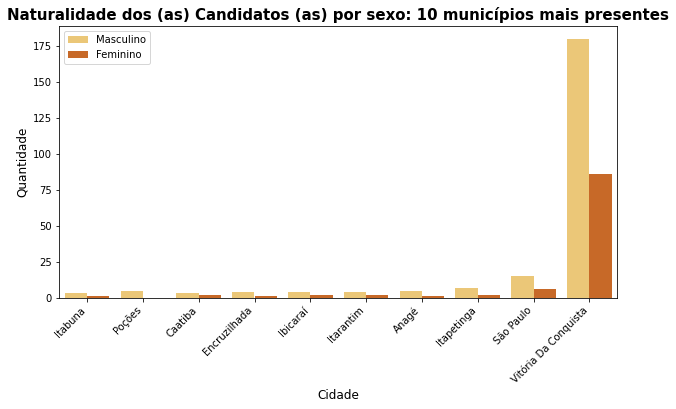

In [19]:
#Naturalidade dos candidatos
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x='Município de Nascimento', hue='Sexo', data=df_cand20, palette='YlOrBr',
              order=df_cand20['Município de Nascimento'].value_counts()[:10]\
             .sort_values().index).set_title('Naturalidade dos (as) Candidatos (as) por sexo: 10 municípios mais presentes', fontsize=15,
                                             weight='bold')
plt.legend(loc='upper left')
plt.xlabel('Cidade', fontdict= {'size':12})
plt.ylabel('Quantidade',fontdict= {'size':12})
plt.xticks(rotation=45, horizontalalignment='right');

<p>Conforme a figura acima, a maioria dos candidatos no município de Vitória da Conquista são naturais de municípios do Sudoeste e Médio Sudoeste baianos: Poções, Caatiba, Encruzilhada, Anagé, Itarantim e Itapetinga (<a href="http://www.seplan.ba.gov.br/modules/conteudo/conteudo.php?conteudo=17">lista dos territórios baianos</a>). <br>
A figura a seguir ajuda a visualizar a proporção entre os conquistenses e não conquistenses.
</p>

In [20]:
# copiando o dataframe 
df_ext = df_cand20.copy()
df_ext = df_ext[df_ext['Município de Nascimento'] != "Vitória Da Conquista"]
df_vdc_nasc = df_cand20[df_cand20['Município de Nascimento'] == 'Vitória Da Conquista']                  

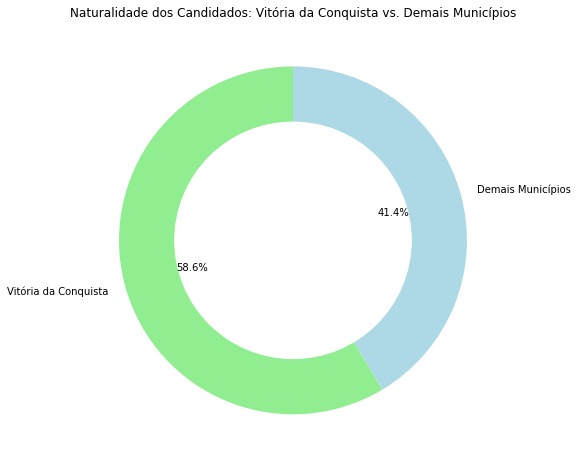

In [21]:
# Donut chart
plt.figure(figsize=(12,8))
slices = [len(df_vdc_nasc),len(df_ext)]
labels = ['Vitória da Conquista', 'Demais Municípios']
plt.pie(slices,
        labels = labels,
        startangle = 90, #começa do ângulo de 90
        autopct = '%1.1f%%',
        colors = ['lightgreen', 'lightblue']) #colocar porcentagem no gráfico

my_circle=plt.Circle( (0,0), 0.68, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.title('Naturalidade dos Candidados: Vitória da Conquista vs. Demais Municípios')
plt.show()

<p>
Por ser um município com uma grande influência econômica e política na região, é compreensível que boa parte dos candidatos sejam naturais de outros municípios, principalmente do Sudoeste e Médio Sudoeste.
</p>

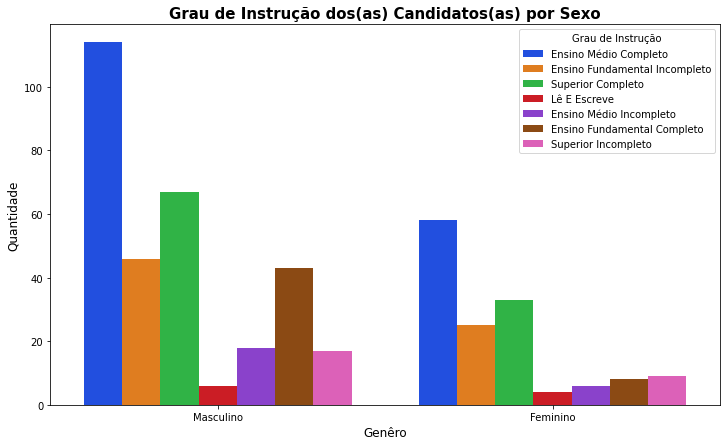

In [22]:
#Grau de Instrução dos candidatos por sexo
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(x='Sexo', hue='Grau de Instrução', data=df_cand20, palette='bright',
              order=df_cand20['Sexo'].value_counts()[:10]\
             .sort_values(ascending=False).index).set_title('Grau de Instrução dos(as) Candidatos(as) por Sexo', fontsize=15,
                                             weight='bold')
plt.xlabel('Genêro', fontdict= {'size':12})
plt.ylabel('Quantidade',fontdict= {'size':12});

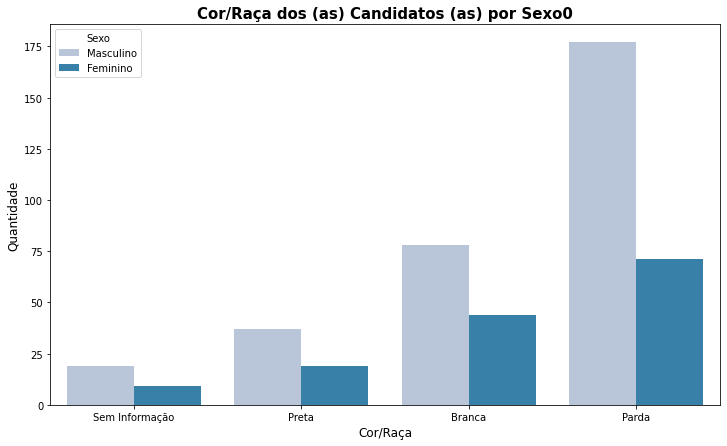

In [23]:
#Cor/raça dos candidatos
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(x='Cor/Raça', hue='Sexo', data=df_cand20, palette='PuBu',
              order=df_cand20['Cor/Raça'].value_counts()[:10]\
             .sort_values().index).set_title('Cor/Raça dos (as) Candidatos (as) por Sexo0', fontsize=15,
                                             weight='bold')
plt.xlabel('Cor/Raça', fontdict= {'size':12})
plt.ylabel('Quantidade',fontdict= {'size':12});

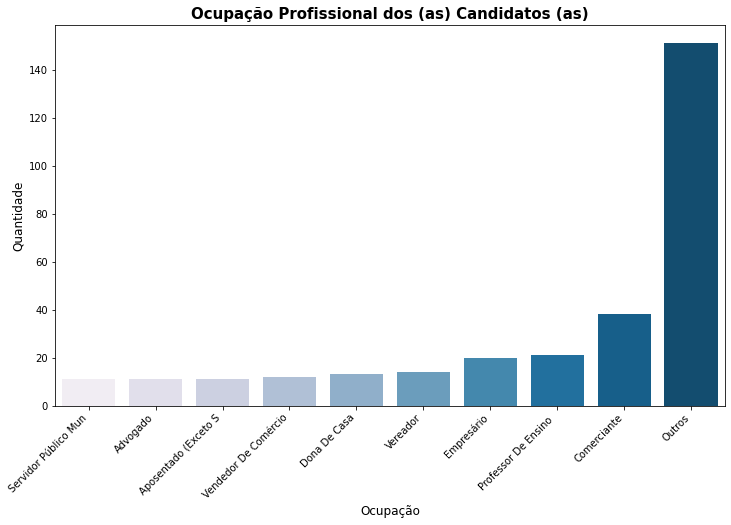

In [24]:
#ocupação dos candidatos
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(x='Ocupação', data=df_cand20, palette='PuBu',
              order=df_cand20['Ocupação'].value_counts()[:10]\
             .sort_values().index).set_title('Ocupação Profissional dos (as) Candidatos (as)', fontsize=15,
                                             weight='bold')
plt.xlabel('Ocupação', fontdict= {'size':12})
plt.ylabel('Quantidade',fontdict= {'size':12})
plt.xticks(rotation=45, horizontalalignment='right');

Embora a grande maioria declarou pertencer a nenhuma das profissões listadas, muitos candidatos são comerciantes, o que faz sentido visto a importância do setor dos serviços na cidade. Conforme dados do IBGE (<a href="https://cidades.ibge.gov.br/brasil/ba/vitoria-da-conquista/pesquisa/38/47001">IBGE Cidades 2017</a>), cerca de 64% do valor adicionado bruto a preços correntes do município se deve aos serviços (que também compreende comércio).

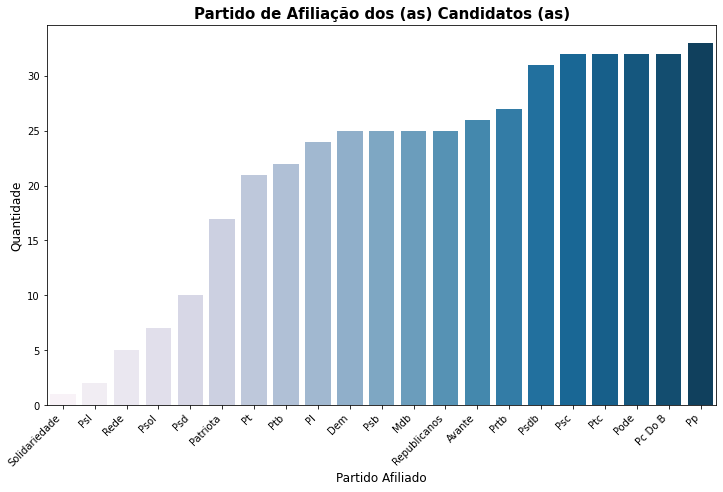

In [25]:
#Partido de Afiliação dos candidatos
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(x='Partido', data=df_cand20, palette='PuBu',
              order=df_cand20['Partido'].value_counts()[:]\
             .sort_values().index).set_title('Partido de Afiliação dos (as) Candidatos (as)', fontsize=15,
                                             weight='bold')
plt.xlabel('Partido Afiliado', fontdict= {'size':12})
plt.ylabel('Quantidade',fontdict= {'size':12})
plt.xticks(rotation=45, horizontalalignment='right');

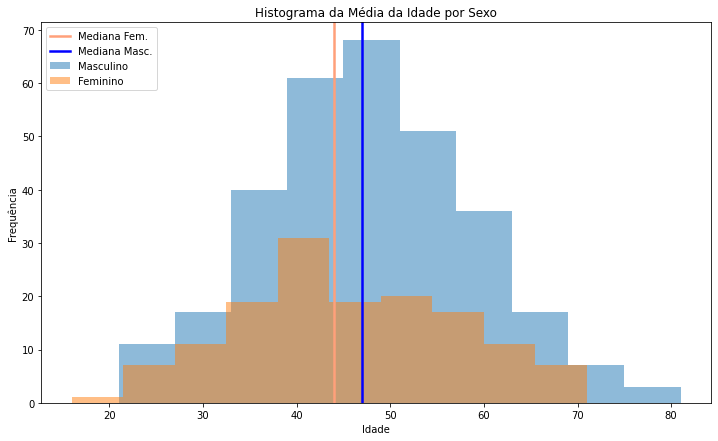

In [26]:
#Histograma da idade por sexo
df_men = df_cand20[df_cand20['Sexo']=='Masculino']
df_wmen = df_cand20[df_cand20['Sexo']=='Feminino']
plt.figure(figsize=(12,7))
plt.hist(df_men['Idade'], alpha=0.5, label='Masculino')
plt.hist(df_wmen['Idade'], alpha=0.5, label='Feminino')
plt.legend(loc='upper right')
plt.axvline(44, color = 'lightSalmon', label='Mediana Fem.', linewidth = 2.5)
plt.axvline(47, color = 'blue', label='Mediana Masc.', linewidth = 2.5)
plt.title('Histograma da Média da Idade por Sexo')
plt.legend(loc='upper left')
plt.xlabel('Idade')
plt.ylabel('Frequência');

Tanto a figura acima quanto o coeficiente de curtose na tabela a seguir indicam o <i>achatamento</i> da distribuições em relação à distribuição normal. <br>
A média do sexo Feminino sendo maior que sua mediana indica que a segunda metade dos valores estão mais distantes do centro do que a primeira metade. O mesmo ocorre com o caso do sexo Masculino e, embora a diferença seja menor, os valores da primeira metade também estão mais próximos do centro. Ambas afirmações podem ser constatadas na figura acima e pela assimetria positiva (à direita) na tabela abaixo.


Medidas de tendência central e de dispersão da idade dos (as) candidatos (as) por sexo
<table>
<thead>
<tr>
<th>Medida</th>
<th>Feminino</th>
<th>Masculino</th>
</tr>
</thead>
<tbody>
<tr>
<td>min</td>
<td>16</td>
<td>21</td>
</tr>
<tr>
<td>max</td>
<td>71</td>
<td>81</td>
</tr>
<tr>
<td>mean</td>
<td>45.19</td>
<td>47.23</td>
</tr>
<tr>
<td>median</td>
<td>44</td>
<td>47</td>
</tr>
<tr>
<td>std</td>
<td>11.76</td>
<td>11.14</td>
</tr>
<tr>
<td>skewness</td>
<td>0.0915</td>
<td>0.125</td>
</tr>
<tr>
<td>kurtosis</td>
<td>-0.624</td>
<td>-0.159</td>
</tr>
</tbody>
</table>

In [27]:
vca_raca = df_cand20.groupby(['Sexo','Cor/Raça'])
vca_raca = vca_raca.mean()
vca_raca1 = vca_raca.reset_index()

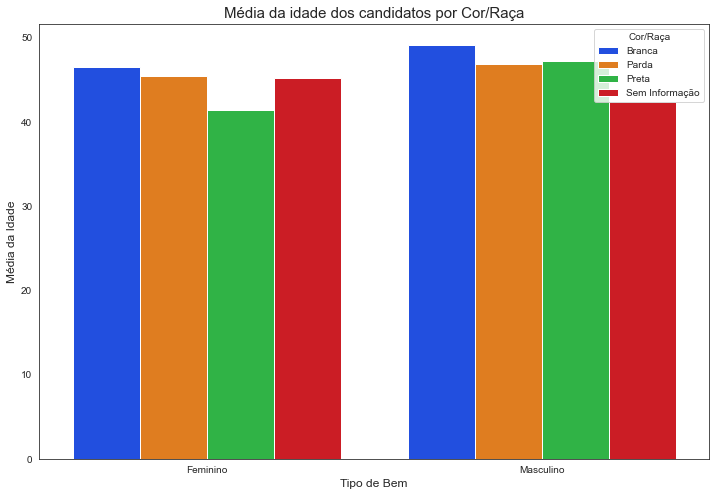

In [28]:
# Média de idade dos candidatos por Cor/Raça
plt.figure(figsize=(12,8))
sns.set_style("white")
g_vca_mean = sns.barplot(x="Sexo", y="Idade", hue='Cor/Raça',data=vca_raca1, palette='bright')
g_vca_mean.xaxis.set_label_text("Tipo de Bem",fontdict= {'size':12})
g_vca_mean.yaxis.set_label_text("Média da Idade", fontdict= {'size':12})
g_vca_mean.set_title("Média da idade dos candidatos por Cor/Raça",fontdict= {'size':15});

## 4) Comparativo entre ambos períodos eleitorais

In [29]:
# Criando Colunas com os respectivos anos em cada dataframe e concatenando ambos
df_cand16['year'] = '2016'
df_cand20['year'] = '2020'
df_to_concat = [df_cand16,df_cand20]
df_cand1620 =pd.concat(df_to_concat)

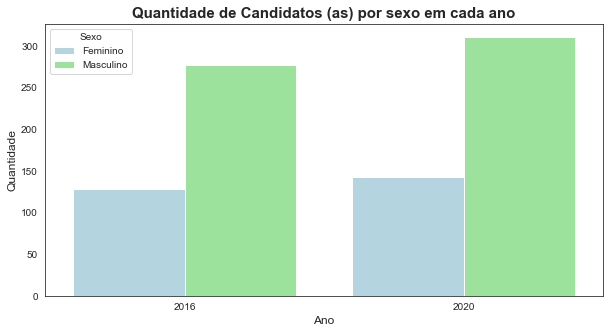

In [30]:
# Diferença do número de candidatos (as) por sexo em cada ano
fig, ax = plt.subplots(figsize=(10,5))
sx_p = sns.countplot(x='Ano', data=df_cand1620, hue='Sexo', palette=['lightblue', 'lightgreen'], hue_order=['Feminino', 'Masculino'],
              order=df_cand1620['Ano'].value_counts()\
             .sort_values().index).set_title('Quantidade de Candidatos (as) por sexo em cada ano', fontsize=15,
                                             weight='bold')
plt.xlabel('Ano', fontdict= {'size':12})
plt.ylabel('Quantidade',fontdict= {'size':12});

Quantidade e Proporção dos (as) Candidatos (as) por Sexo
<table>
<thead>
<tr>
<th>Ano</th>
<th>Feminino</th>
<th>Masculino</th>
</tr>
</thead>
<tbody>
<tr>
<td>2016</td>
<td>128 (~31,6%)</td>
<td>277 (~68,4%)</td>
</tr>
<tr>
<td>2020</td>
<td>143 (~31,5%)</td>
<td>311 (~68,5%)</td>
</tr>
</tbody>
</table>

<p>
Nos quatro anos desde as últimas eleições municipais, a proporção entre os sexos praticamente não mudou, indicando que o município ainda tem muito a avançar quanto a participação feminina nas eleições municipais.
</p>

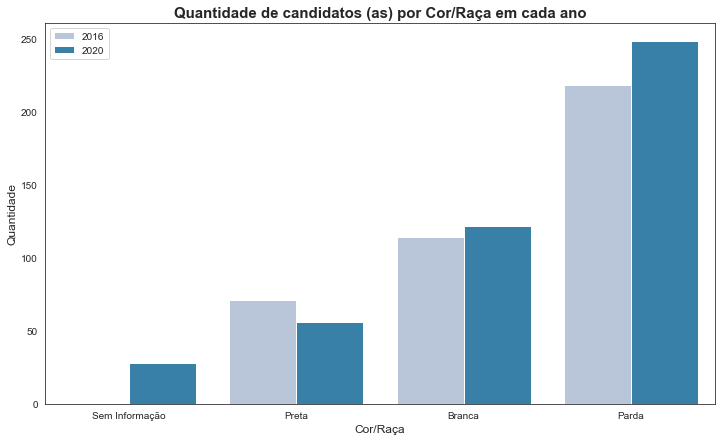

In [31]:
# Candidatos (as) por cor/raça
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(x='Cor/Raça', data=df_cand1620, hue ='Ano',palette='PuBu',
              order=df_cand20['Cor/Raça'].value_counts()[:10]\
             .sort_values().index).set_title('Quantidade de candidatos (as) por Cor/Raça em cada ano', fontsize=15,
                                             weight='bold')
plt.legend(loc='upper left')
plt.xlabel('Cor/Raça', fontdict= {'size':12})
plt.ylabel('Quantidade',fontdict= {'size':12});

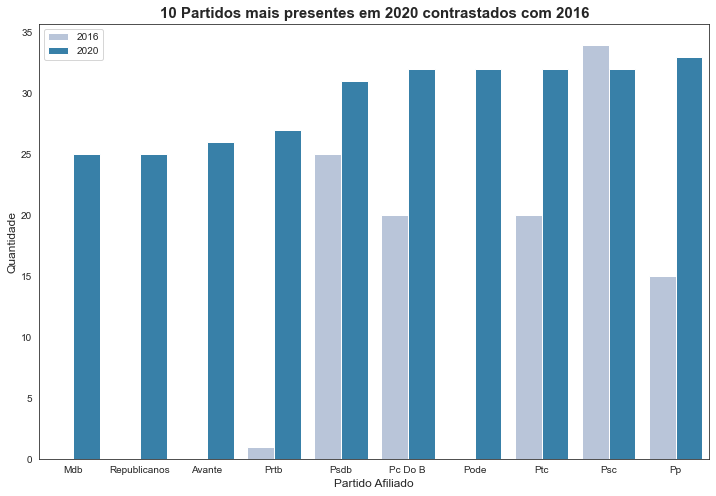

In [32]:
#Partido de Afiliação dos (as) candidatos (as)
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(x='Partido', data=df_cand1620, hue ='Ano',palette='PuBu',
              order=df_cand20['Partido'].value_counts()[:10]\
             .sort_values().index).set_title('10 Partidos mais presentes em 2020 contrastados com 2016', fontsize=15,
                                             weight='bold')
plt.legend(loc='upper left')
plt.xlabel('Partido Afiliado', fontdict= {'size':12})
plt.ylabel('Quantidade',fontdict= {'size':12});

<p>A maioria dos partidos com mais candidatos em 2020 não possuiam muita presença em 2016. Parte disso pode ser explicado pelo fim das coligações.</p>

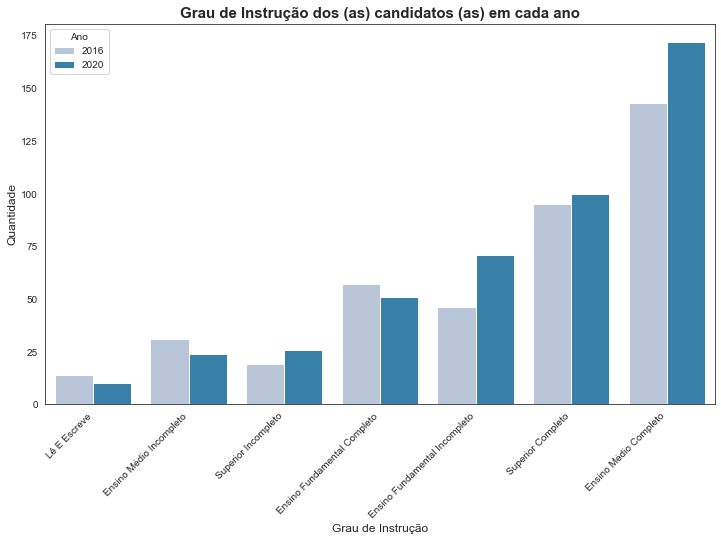

In [33]:
# Grau de Instrução dos (as) candidatos (as)
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(x='Grau de Instrução', data=df_cand1620, hue ='Ano',palette='PuBu',
              order=df_cand20['Grau de Instrução'].value_counts()[:10]\
             .sort_values().index).set_title('Grau de Instrução dos (as) candidatos (as) em cada ano', fontsize=15,
                                             weight='bold')
plt.xlabel('Grau de Instrução', fontdict= {'size':12})
plt.ylabel('Quantidade',fontdict= {'size':12})
plt.xticks(rotation=45, horizontalalignment='right');

O Ensino Médio Completo continua sendo o mais frequente entre os (as) candidatos (as). É notável o aumento no número de candidatos (as) com ensino fundamental incompleto.

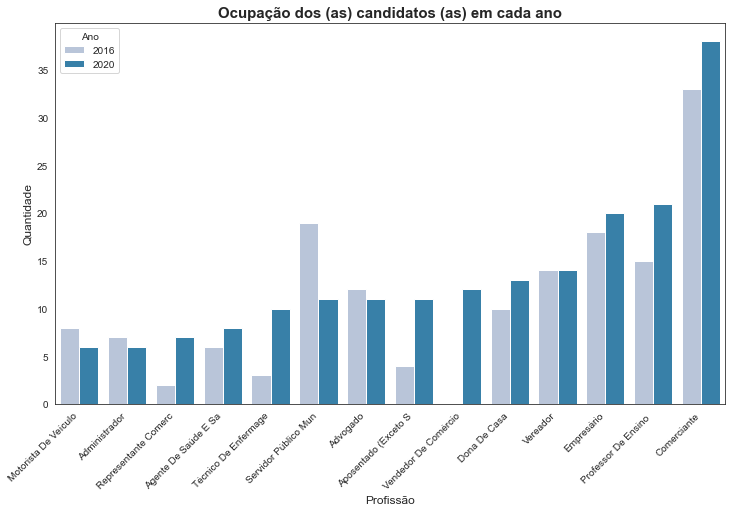

In [34]:
#Ocupação dos (as) candidatos (as) em cada ano
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(x='Ocupação', data=df_cand1620, hue ='Ano',palette='PuBu',
              order=df_cand20['Ocupação'].value_counts()[1:15]\
             .sort_values().index).set_title('Ocupação dos (as) candidatos (as) em cada ano', fontsize=15,
                                             weight='bold')
plt.xlabel('Profissão', fontdict= {'size':12})
plt.ylabel('Quantidade',fontdict= {'size':12})
plt.xticks(rotation=45, horizontalalignment='right');

<p>
Os (as) candidatos (as) do setor comercio/empresarial tiveram um significativo aumento de quantidade. Por outro lado, a quantidade de candidatos (as) servidores municipais diminuiu consideravelmente.
</p>

## 5) Conclusão

<p>Em suma, a maioria dos candidatos declararam possuir Casa, Veículos Automotores, Terrenos e Dinheiro em Espécie. Além disso, há bens que poucos candidatos possuem mas que possuem altos valores, como prédio residencial.</p>
<p>Foi também observado que cerca de 58% dos candidatos são naturais de Vitória da Conquista. <i>continuar...</i></p>